# Trabajo Practico 1

In [1]:
# encoding=utf8

# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Carga de datos, indicando el tipo de dato se redujo de 71.3 Mb a 13.2 Mb
data_values = pd.read_csv('train_values.csv',dtype = {
    "geo_level_1_id" : "int16", 
    "geo_level_2_id" : "int16",
    "geo_level_3_id" : "int16",
    "count_floors_pre_eq" : "int8",
    "age" : "int16",
    "area_percentage" :"int16",
    "height_percentage" :"int16",
    "land_surface_condition" :"category",
    "foundation_type" :"category",
    "roof_type" :"category",
    "ground_floor_type" :"category",
    "other_floor_type" :"category",
    "position" :"category",
    "plan_configuration" :"category",
    "has_superstructure_adobe_mud" : "bool",
    "has_superstructure_mud_mortar_stone" : "bool",
    "has_superstructure_stone_flag" : "bool",
    "has_superstructure_cement_mortar_stone" : "bool",
    "has_superstructure_mud_mortar_brick" : "bool",
    "has_superstructure_cement_mortar_brick" : "bool",
    "has_superstructure_timber" : "bool",
    "has_superstructure_bamboo" : "bool",
    "has_superstructure_rc_non_engineered" : "bool",
    "has_superstructure_rc_engineered" : "bool",
    "has_superstructure_other" : "bool",
    "legal_ownership_status" :"category",
    "count_families" : "int16",
    "has_secondary_use" : "bool",
    "has_secondary_use_agriculture" : "bool",
    "has_secondary_use_hotel" : "bool",
    "has_secondary_use_rental" : "bool",
    "has_secondary_use_institution" : "bool",
    "has_secondary_use_school" : "bool",
    "has_secondary_use_industry" : "bool",
    "has_secondary_use_health_post" : "bool",
    "has_secondary_use_gov_office" : "bool",
    "has_secondary_use_use_police" : "bool",
    "has_secondary_use_other" : "bool"
                    
})

data_labels = pd.read_csv('train_labels.csv',dtype = {
    "damage_grade" : "category"    
})

In [3]:
data_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int16   
 2   geo_level_2_id                          260601 non-null  int16   
 3   geo_level_3_id                          260601 non-null  int16   
 4   count_floors_pre_eq                     260601 non-null  int8    
 5   age                                     260601 non-null  int16   
 6   area_percentage                         260601 non-null  int16   
 7   height_percentage                       260601 non-null  int16   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [4]:
data_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   building_id   260601 non-null  int64   
 1   damage_grade  260601 non-null  category
dtypes: category(1), int64(1)
memory usage: 2.2 MB


In [5]:
data_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


## Calculo porcentaje de tipo de daño de los edifcios

In [6]:
cantidad_edificios = data_labels["building_id"].count()
cantidad_edificios

260601

In [7]:
damage = data_labels.groupby(["damage_grade"]).count()
damage

,building_id
damage_grade,
1,25124
2,148259
3,87218


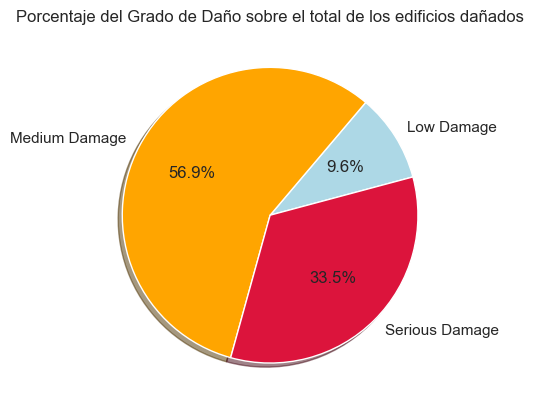

In [8]:
#Definir colores
my_colors = my_colors = ['lightblue','orange','crimson']

plt.pie(damage["building_id"].to_list(),
        labels = ["Low Damage" ,"Medium Damage","Serious Damage"],
        autopct='%1.1f%%',
        startangle=15,           
        shadow = True,
        colors = my_colors
)
plt.title("Porcentaje del Grado de Daño sobre el total de los edificios dañados")
plt.show()

## Mis columnas a estudiar

In [9]:
# Me quedo solo con los datos que me toca analizar
data_values_short = data_values.loc[:,["building_id",
                                       "geo_level_1_id",
                                       "geo_level_2_id",
                                       "geo_level_3_id",
                                       "count_floors_pre_eq",
                                       "age",
                                       "area_percentage",
                                       "height_percentage"
                                      ]]
data_values_short["cantidad"] = 1
data_values_short

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,cantidad
0,802906,6,487,12198,2,30,6,5,1
1,28830,8,900,2812,2,10,8,7,1
2,94947,21,363,8973,2,10,5,5,1
3,590882,22,418,10694,2,10,6,5,1
4,201944,11,131,1488,3,30,8,9,1
...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,1
260597,669485,17,715,2060,2,0,6,5,1
260598,602512,17,51,8163,3,55,6,7,1
260599,151409,26,39,1851,2,10,14,6,1


In [10]:
# Unifico data frames
data_values_short["damage_grade"] = data_labels["damage_grade"]
data_values_short

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,cantidad,damage_grade
0,802906,6,487,12198,2,30,6,5,1,3
1,28830,8,900,2812,2,10,8,7,1,2
2,94947,21,363,8973,2,10,5,5,1,3
3,590882,22,418,10694,2,10,6,5,1,2
4,201944,11,131,1488,3,30,8,9,1,3
...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,1,2
260597,669485,17,715,2060,2,0,6,5,1,3
260598,602512,17,51,8163,3,55,6,7,1,3
260599,151409,26,39,1851,2,10,14,6,1,2


## Por Edades

In [11]:
daño_por_edad = data_values_short.groupby(["age","damage_grade"]).agg({"cantidad" : "count"})
daño_por_edad

cantidad
age damage_grade          
0   1                 7213
    2                12721
    3                 6107
5   1                 5590
    2                19030
...                    ...
200 2                   64
    3                   39
995 1                  179
    2                  822
    3                  389

[126 rows x 1 columns]

In [12]:
data_values_short["age"].value_counts().head(10)

10    38896
15    36010
5     33697
20    32182
0     26041
25    24366
30    18028
35    10710
40    10559
50     7257
Name: age, dtype: int64

## Por ubicacion geografica

In [15]:
# Analizo las 10 regiones con mayor cantidad de edificios dañados
top10MasDañadas = dict(data_values_short["geo_level_1_id"].value_counts().nlargest(10))
id_mas_dañadas = sorted(list(top10MasDañadas.keys()))
id_mas_dañadas

[4, 6, 7, 8, 10, 17, 20, 21, 26, 27]

In [21]:
data_values_short["geo_level_1_id"].value_counts()

6     24381
26    22615
10    22079
17    21813
8     19080
7     18994
20    17216
21    14889
4     14568
27    12532
13     9608
11     8220
3      7540
22     6252
25     5624
16     4332
0      4011
9      3958
12     3194
18     3189
1      2701
5      2690
30     2686
15     2320
14     1714
24     1310
23     1121
2       931
29      396
19      372
28      265
Name: geo_level_1_id, dtype: int64

In [14]:
daño_por_lugar = data_values_short\
.groupby(["geo_level_1_id","damage_grade"])\
.agg({"cantidad" : "count"})
daño_por_lugar.reset_index(inplace = True)
daño_por_lugar
    

,geo_level_1_id,damage_grade,cantidad
0,0,1,337
1,0,2,3075
2,0,3,599
3,1,1,411
4,1,2,1985
...,...,...,...
88,29,2,349
89,29,3,39
90,30,1,252
91,30,2,2127


In [16]:
id_low = []
id_medium = []
id_high = []
for i in range(0,len(daño_por_lugar)-1):
    if daño_por_lugar.loc[i,"geo_level_1_id"] in id_mas_dañadas:

        if (daño_por_lugar.loc[i,"damage_grade"] == "1"):
            id_low.append(daño_por_lugar.loc[i,"cantidad"])
        elif (daño_por_lugar.loc[i,"damage_grade"] == "2"):
            id_medium.append(daño_por_lugar.loc[i,"cantidad"])
        elif (daño_por_lugar.loc[i,"damage_grade"] == "3"):
            id_high.append(daño_por_lugar.loc[i,"cantidad"])

In [17]:
id_low

[521, 2108, 1033, 654, 1211, 285, 3311, 322, 8028, 465]

In [18]:
id_medium

[11164, 16222, 11273, 8513, 12107, 3913, 11860, 5857, 12645, 6007]

In [19]:
id_high

[2883, 6051, 6688, 9913, 8761, 17615, 2045, 8710, 1942, 6060]

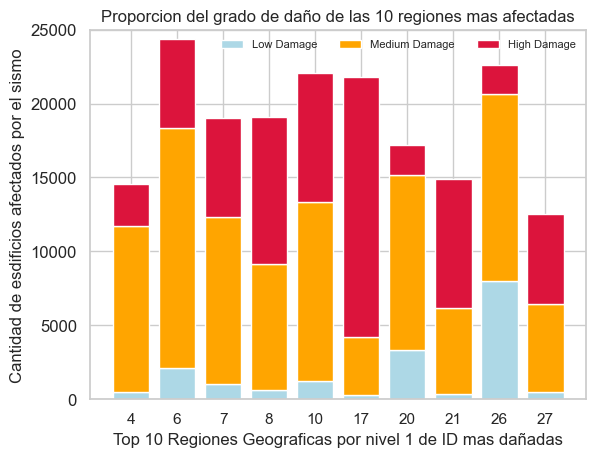

In [50]:
my_colors = ['lightblue','orange','crimson']
labels = ["4","6", "7", "8", "10", "17", "20", "21", "26", "27"]
header = ["Low Damage","Medium Damage","High Damage"]
dataset= [id_low,id_medium,id_high]

p1 = plt.bar(labels, dataset[0], color='lightblue',label = 'Low Damage')
p2 = plt.bar(labels, dataset[1], bottom=dataset[0], color='orange',label = 'Medium Damage')
p3 = plt.bar(labels, dataset[2], bottom= np.array(dataset[0])+np.array(dataset[1]), color='crimson',label = 'High Damage')

plt.ylim([0,25000])
plt.title("Proporcion del grado de daño de las 10 regiones mas afectadas",fontsize = 12)
plt.yticks(fontsize=12)
plt.ylabel("Cantidad de esdificios afectados por el sismo", fontsize=12)
plt.xlabel('Top 10 Regiones Geograficas por nivel 1 de ID mas dañadas', fontsize=12)
plt.legend((p1[0], p2[0], p3[0]), (header[0], header[1], header[2]), fontsize=8, ncol=3, framealpha=0, fancybox=True)
plt.show()


## Por cantidad de pisos

In [ ]:
#Analizo porcentaje de daños por cantidad de pisos
daño_por_pisos = data_values_short.groupby(["count_floors_pre_eq","damage_grade"]).agg({"cantidad" : "count"})
daño_por_pisos.reset_index(inplace = True)


In [ ]:
data_values_short["count_floors_pre_eq"].value_counts()

In [ ]:
list(daño_por_pisos[daño_por_pisos["damage_grade"]=="1"]["cantidad"])

In [ ]:
my_colors = my_colors = ['lightblue','orange','crimson']
labels = list(range(1,10))

low =list(daño_por_pisos[daño_por_pisos["damage_grade"]=="1"]["cantidad"])
medium=list(daño_por_pisos[daño_por_pisos["damage_grade"]=="2"]["cantidad"])
high = list(daño_por_pisos[daño_por_pisos["damage_grade"]=="3"]["cantidad"])

plt.bar(labels, low, color='lightblue',label = 'Low Damage')
plt.bar(labels, medium, bottom=low, color='orange',label = 'Medium Damage')
plt.bar(labels, high, bottom=medium, color='crimson',label = 'High Damage')
plt.show()


## Por altura del edificio

In [ ]:
#Analizo porcentaje de daño por altura
daño_por_altura = data_values_short.groupby(["height_percentage","damage_grade"]).agg({"cantidad" : "count"})
daño_por_altura

## Por area del edificio 

In [ ]:
#Analizo porcentaje de daño por area
daño_por_area = data_values_short.groupby(["area_percentage","damage_grade"]).agg({"cantidad" : "count"})
daño_por_area